# Imports

In [1]:
import os
import numpy as np
import tensorflow as tf
import keras
import itertools

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
tf.random.set_seed(404)
from numpy.random import seed
seed(888)

# Constants

In [3]:
LOG_DIR = "tensorboard_cifar_logs"

LABEL_NAMES = ['Plane', 'Car', 'Brid', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) =  cifar10.load_data()

In [5]:
type(cifar10)

module

In [6]:
type(x_test)

numpy.ndarray

In [7]:
x_train_all.shape

(50000, 32, 32, 3)

In [8]:
y_train_all.shape

(50000, 1)

# Explore the Data

In [9]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

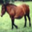

In [10]:
pic = array_to_img(x_train_all[7])
display(pic)

In [11]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

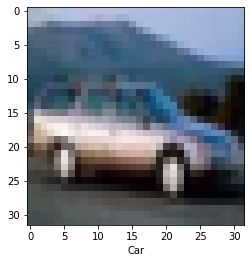

In [12]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]])
plt.show()

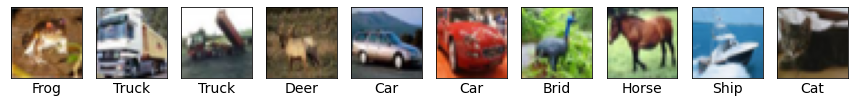

In [13]:
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [14]:
x_train_all[0].shape

(32, 32, 3)

In [15]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [16]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [17]:
type(x_train_all[0][0][0][0]) # uint -> unsigned integer

numpy.uint8

In [18]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0  # X values are in range of 0-255, 
# dividing by 255 will convert them into floats, and all values will be in range 0-1

In [19]:
type(x_train_all[0][0][0][0])

numpy.float64

In [20]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [21]:
x_train_all.shape

(50000, 3072)

In [22]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shae of x_test is {x_test.shape}')

Shae of x_test is (10000, 3072)


### Create Validation Dataset

In [23]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [24]:
x_train = x_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

In [25]:
y_train = y_train_all[VALIDATION_SIZE:]
y_train.shape

(40000, 1)

### Create a small dataset

In [26]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]
y_train_xs.shape

(1000, 1)

# Define the Neural Network using Keras

In [27]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')    
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [28]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [29]:
model_3 = Sequential()
model_3.add(Dropout(0.25, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [30]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [31]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [32]:
# m1 parameters: pixels + channel + neurals
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

# Tensorboard (visualising learning)

In [33]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the model

In [34]:
samples_per_batch = 1000

In [35]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

In [ ]:
%%time
nr_epochs = 150
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


In [64]:
%%time
nr_epochs = 150
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 3min 50s


In [65]:
%%time
nr_epochs = 150
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 3min 56s


In [66]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

In [67]:
# %%time
# nr_epochs = 150
# model_3.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 3')], verbose=0, validation_data=(x_val, y_val))

## Predictions on Individual Images

In [69]:
x_val[0].shape

(3072,)

In [73]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [78]:
np.set_printoptions(precision=3)

In [79]:
model_2.predict(test)

array([[7.187e-03, 2.556e-03, 8.607e-02, 6.290e-02, 6.515e-02, 4.823e-02,
        6.396e-01, 8.594e-02, 7.994e-05, 2.296e-03]], dtype=float32)

In [81]:
model_2.predict(x_val).shape

(10000, 10)

In [85]:
model_2.predict_classes(test)
test.shape

(1, 3072)

In [83]:
y_val[0]

array([6], dtype=uint8)

In [92]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    print(f'Image number: {i+1}')
    print(f'Predicted : {model_2.predict_classes(test)[0]}')
    print(f'Actual: {y_val[i][0]}')
    print('\n')
    

Image number: 1
Predicted : 6
Actual: 6


Image number: 2
Predicted : 9
Actual: 9


Image number: 3
Predicted : 9
Actual: 9


Image number: 4
Predicted : 6
Actual: 4


Image number: 5
Predicted : 1
Actual: 1


Image number: 6
Predicted : 9
Actual: 1


Image number: 7
Predicted : 6
Actual: 2


Image number: 8
Predicted : 7
Actual: 7


Image number: 9
Predicted : 8
Actual: 8


Image number: 10
Predicted : 2
Actual: 3




# Evaluation

In [93]:
model_2.metrics_names

['loss', 'accuracy']

In [97]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 0s 34us/sample - loss: 1.3965 - accuracy: 0.5097
Test loss is 1.4 and test accuracy is 51.0%


In [ ]:
### Confusion metrix

In [99]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [100]:
conf_matrix.shape

(10, 10)

In [101]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [102]:
conf_matrix.max()

670

In [103]:
conf_matrix.min()

6

In [109]:
conf_matrix[0]

array([598,  27,  82,  13,  22,  12,  28,  36, 140,  42], dtype=int64)

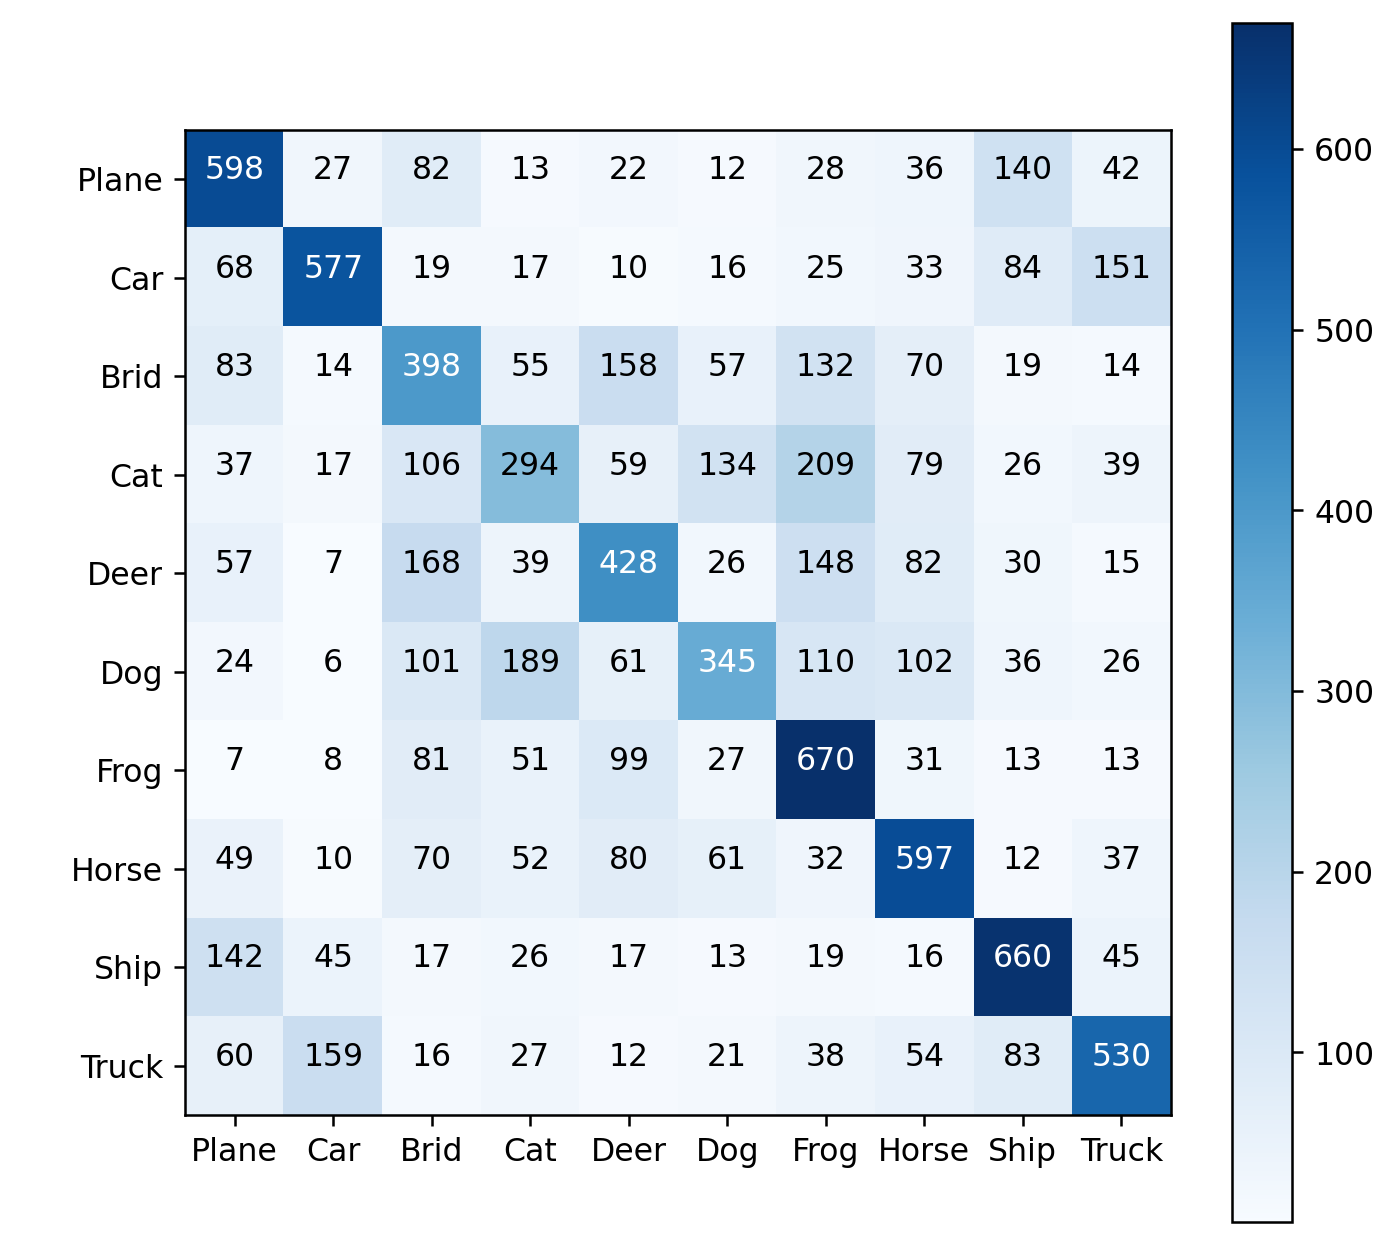

In [122]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix', fontsize=16, color='white')
plt.ylabel('Actual Labels', fontsize=12, color='white')
plt.xlabel('Predicted Labels', fontsize=12, color='white')

tick_marks= np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

In [124]:
# True Positives
np.diag(conf_matrix)

array([598, 577, 398, 294, 428, 345, 670, 597, 660, 530], dtype=int64)

In [125]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.598, 0.577, 0.398, 0.294, 0.428, 0.345, 0.67 , 0.597, 0.66 ,
       0.53 ])

In [127]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.532, 0.663, 0.376, 0.385, 0.452, 0.485, 0.475, 0.543, 0.598,
       0.581])

In [132]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 50.97%


In [133]:
avg_precision = np.mean(precision)
print(f'Model 2 precision is {avg_precision:.2%}')

Model 2 precision is 50.90%


In [135]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 F-score is {f1_score:.2%}')

Model 2 F-score is 50.94%
